We will discuss on below:
    1. boxplot and violinplot
    2. ploting and customizing pie & histogram charts
    3. visualize autocorrelations and changes from base line using stemplots
    4. customize and use stackplots
    
Box Plot and Violin plot are used to view important statistical information about any dataset.    

<h2>Box Plot</h2>

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
x = np.random.randint(0,20,20)
x.sort()
x

array([ 0,  2,  4,  5,  5,  6,  7,  8,  8, 11, 11, 12, 12, 14, 14, 14, 14,
       15, 16, 17])

{'whiskers': [<matplotlib.lines.Line2D at 0x12cc37560c8>,
 'caps': [<matplotlib.lines.Line2D at 0x12cc3756388>,
 'boxes': [<matplotlib.lines.Line2D at 0x12cc36b12c8>],
 'medians': [<matplotlib.lines.Line2D at 0x12cc3769d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x12cc3769f48>],
 'means': []}

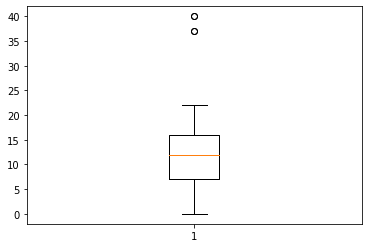

In [18]:
plt.boxplot(x)
# plt.show()

The boxplot represents values between the **25th and 75th** percentiles.
Central horizontal line is **median** of the data, as box plot is drawn using sorted data.
The **caps** at both end represent the range of values(excluding outliers) in the data.
The **Whiskers** are the bars which connect the box with the caps

*Let's add a high value to change the dimension of the boxplot*

*NOTE* : Matplot does not consider added value 22 as outlier, instead, the top gap of the dataset has extended to include the value 22 and median of our data has also changed.

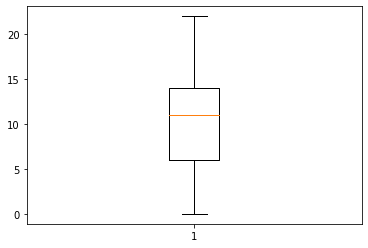

In [11]:
x = np.append(x, 22)
plt.boxplot(x)
plt.show()

Adding data points which will be clear outliers in our data set. Let's add 37 and 40 to the dataset which are clear outliers for initial dataset.

*Outliers are represented by circles outside the box called Fliers*

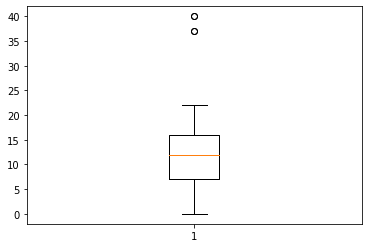

In [13]:
x = np.append(x, 37)
x = np.append(x, 40)

plt.boxplot(x)
plt.show()

Matplotlib pots the boxplot vertically oriented by default. Use vert=False to make it horizontal.

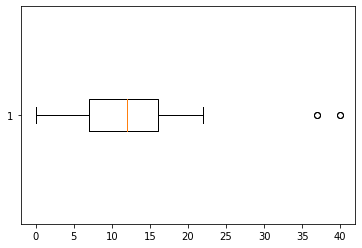

In [14]:
plt.boxplot(x, vert=False)
plt.show()

If median value is significant and you want to draw attention to it, add notch=True

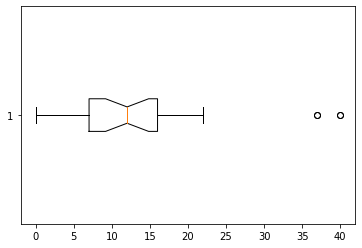

In [15]:
plt.boxplot(x, vert=False, notch=True)
plt.show()

If you want to discard outliers at all, use showfliers=False

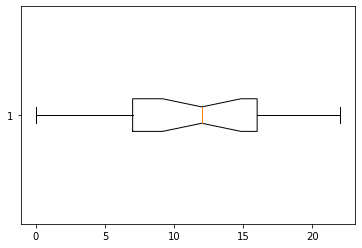

In [16]:
plt.boxplot(x, vert=False, notch=True, showfliers=False)
plt.show()

The default boxplot is  a Line2D object which only allows formatting of the edges. By seting patch_artist=True, we turn it into a 2D Patch

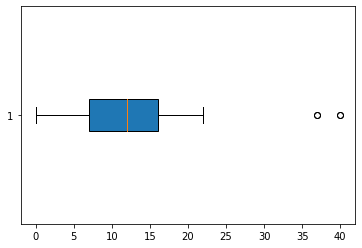

In [17]:
bp = plt.boxplot(x, vert=False, patch_artist=True)

Our boxplot patch is basically just a dictionary that allows us to access the individual components of this 2D patch using the square brackets.

In [19]:
print('Number of boxes ', len(bp['boxes']))
print('Number of whiskers ', len(bp['whiskers']))
print('Number of caps ', len(bp['caps']))
print('Number of medians ', len(bp['medians']))
print('Number of fliers ', len(bp['fliers']))

Number of boxes  1
Number of whiskers  2
Number of caps  2
Number of medians  1
Number of fliers  1


[None, None, None]

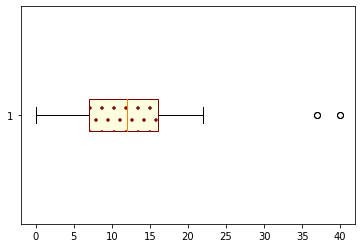

In [20]:
bp = plt.boxplot(x, vert=False, patch_artist=True)

bp['boxes'][0].set(facecolor='lightyellow', edgecolor='maroon', hatch='.')

[None, None]

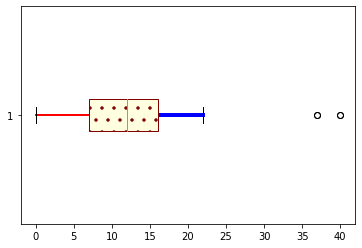

In [21]:
bp = plt.boxplot(x, vert=False, patch_artist=True)

bp['boxes'][0].set(facecolor='lightyellow', edgecolor='maroon', hatch='.')

bp['whiskers'][0].set(color='red', linewidth=2)

bp['whiskers'][1].set(color='blue', linewidth=4)

[None, None]

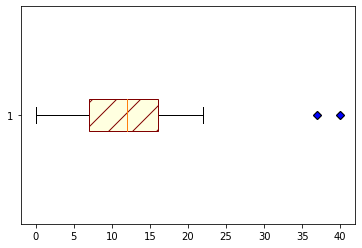

In [22]:
bp = plt.boxplot(x, vert=False, patch_artist=True)

bp['boxes'][0].set(facecolor='lightyellow', edgecolor='maroon', hatch='/')

bp['fliers'][0].set(marker='D', markerfacecolor='blue')

[None, None]

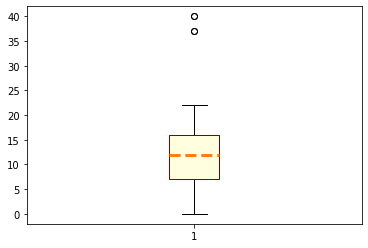

In [24]:
bp = plt.boxplot(x, patch_artist=True)

bp['boxes'][0].set(facecolor='lightyellow', edgecolor='maroon')

bp['medians'][0].set(linestyle='--', linewidth=3)

Let's work with real data and plot Boxplot for that

In [9]:
import pandas as pd
import numpy as np

In [4]:
stock_data = pd.read_csv('resource/stock_px.csv')
stock_data

,Unnamed: 0,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
0,1990-02-01 00:00:00,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1,1990-02-02 00:00:00,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
2,1990-02-05 00:00:00,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
3,1990-02-06 00:00:00,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
4,1990-02-07 00:00:00,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33
...,...,...,...,...,...,...,...,...,...,...
5467,2011-10-10 00:00:00,10.09,388.81,16.14,186.62,64.43,26.94,61.87,1194.89,76.28
5468,2011-10-11 00:00:00,10.30,400.29,16.14,185.00,63.96,27.00,60.95,1195.54,76.27
5469,2011-10-12 00:00:00,10.05,402.19,16.40,186.12,64.33,26.96,62.70,1207.25,77.16
5470,2011-10-13 00:00:00,10.10,408.43,16.22,186.82,64.23,27.18,62.36,1203.66,76.37


In [5]:
stock_data = stock_data[['AA','AAPL','GE']]
stock_data

,AA,AAPL,GE
0,4.98,7.86,2.87
1,5.04,8.00,2.87
2,5.07,8.18,2.87
3,5.01,8.12,2.88
4,5.04,7.77,2.91
...,...,...,...
5467,10.09,388.81,16.14
5468,10.30,400.29,16.14
5469,10.05,402.19,16.40
5470,10.10,408.43,16.22


In [6]:
stock_data.describe()

,AA,AAPL,GE
count,5472.000000,5472.000000,5472.000000
mean,17.440285,57.119313,17.933194
std,9.647999,88.670423,10.647635
min,4.200000,3.230000,2.400000
25%,8.077500,8.760000,6.280000
50%,14.885000,11.990000,18.150000
75%,26.340000,68.017500,27.300000
max,43.620000,422.000000,42.780000


In [18]:
stock_data = stock_data.loc[:100] * 10
stock_data

,AA,AAPL,GE
0,49.8,78.6,28.7
1,50.4,80.0,28.7
2,50.7,81.8,28.7
3,50.1,81.2,28.8
4,50.4,77.7,29.1
...,...,...,...
96,53.9,94.0,33.0
97,53.9,98.4,33.0
98,53.2,97.5,32.7
99,52.9,96.9,32.7


In [19]:
stock_data_array = np.array(stock_data)
stock_data_array

array([[ 49.8,  78.6,  28.7],
       [ 50.4,  80. ,  28.7],
       [ 50.7,  81.8,  28.7],
       [ 50.1,  81.2,  28.8],
       [ 50.4,  77.7,  29.1],
       [ 50.4,  77.1,  29.2],
       [ 50.6,  80. ,  29.4],
       [ 49.6,  79.4,  28.9],
       [ 49.1,  80.6,  28.8],
       [ 49.4,  80. ,  28.9],
       [ 49.9,  80. ,  29.1],
       [ 51. ,  79.1,  28.8],
       [ 50.4,  78.5,  28.3],
       [ 50.1,  79.7,  28.1],
       [ 50.6,  77.3,  28.2],
       [ 50.7,  77.9,  28.1],
       [ 51.3,  79.7,  28.4],
       [ 51.6,  78.5,  28.8],
       [ 52.2,  79.7,  28.9],
       [ 52.6,  80.3,  28.8],
       [ 54.1,  79.1,  29.2],
       [ 53.9,  80.8,  28.9],
       [ 54. ,  82.6,  29.2],
       [ 53.6,  82.9,  29.3],
       [ 53.4,  86.1,  29.5],
       [ 53.3,  86.4,  29.3],
       [ 53.4,  85.8,  29.2],
       [ 52.9,  86.4,  29. ],
       [ 52.8,  86.7,  29.5],
       [ 53.6,  86.1,  29.6],
       [ 54.4,  94.3,  29.9],
       [ 55.3,  99.3,  30.3],
       [ 54.6,  97. ,  30.1],
       [ 5

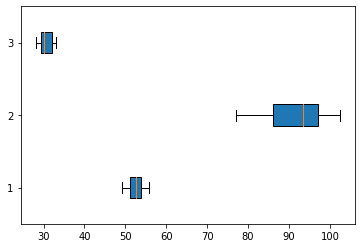

In [20]:
bp = plt.boxplot(stock_data_array, vert=False, patch_artist=True)

([<matplotlib.axis.XTick at 0x23845baffc8>,
 <a list of 3 Text xticklabel objects>)

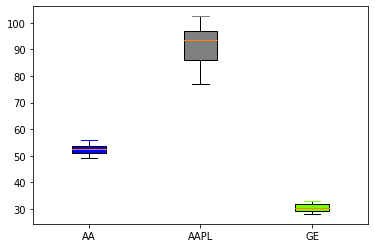

In [21]:
colors = ['blue','grey','lawngreen']

bp = plt.boxplot(stock_data_array, patch_artist=True)

for i in range(len(bp['boxes'])):
    bp['boxes'][i].set(facecolor=colors[i])
    bp['caps'][2*i + 1].set(color=colors[i])
    
plt.xticks([1,2,3],['AA','AAPL','GE'])

<h3>Violin Plot</h3>

This displayes the density of the dataset over it's range of values.

By default Violin plot don't show median information, to show median use showmedian=True

([<matplotlib.axis.YTick at 0x23845ef7d48>,
 <a list of 3 Text yticklabel objects>)

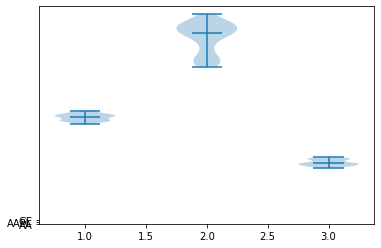

In [29]:
vp =  plt.violinplot(stock_data_array, showmedians=True)

plt.yticks([1,2,3],['AA','AAPL','GE'])

([<matplotlib.axis.YTick at 0x23846079ec8>,
 <a list of 3 Text yticklabel objects>)

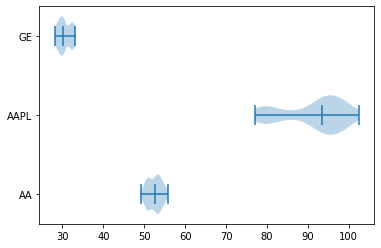

In [30]:
vp =  plt.violinplot(stock_data_array, showmedians=True, vert=False)

plt.yticks([1,2,3],['AA','AAPL','GE'])

In [32]:
# violinplot() return Patch so you can do whole log customization with returned Patch 

# Only bodies component can be customized individually
vp

{'bodies': [<matplotlib.collections.PolyCollection at 0x238460aa188>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x238460b0348>,
 'cmins': <matplotlib.collections.LineCollection at 0x238460b5388>,
 'cbars': <matplotlib.collections.LineCollection at 0x238460b8648>,
 'cmedians': <matplotlib.collections.LineCollection at 0x238460ba6c8>}

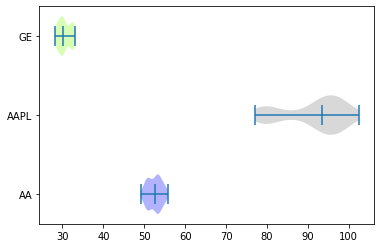

In [34]:
vp =  plt.violinplot(stock_data_array, showmedians=True, vert=False)

plt.yticks([1,2,3],['AA','AAPL','GE'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])

cmaxes, cmins, cbars and cmedians apply to all violin plots and cannot be customized individually

[None]

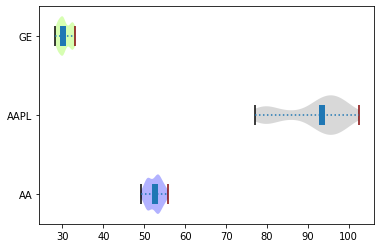

In [35]:
vp =  plt.violinplot(stock_data_array, showmedians=True, vert=False)

plt.yticks([1,2,3],['AA','AAPL','GE'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])
    
vp['cmaxes'].set(color='maroon')
vp['cmins'].set(color='black')
vp['cbars'].set(linestyle=':')
vp['cmedians'].set(linewidth=6)

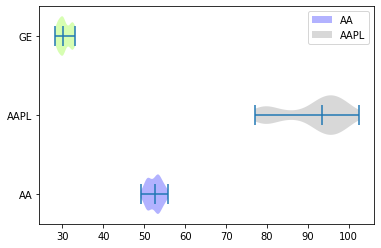

In [37]:
vp =  plt.violinplot(stock_data_array, showmedians=True, vert=False)

plt.yticks([1,2,3],['AA','AAPL','GE'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])
    
plt.legend(handles = [vp['bodies'][0], vp['bodies'][1]],
          labels = ['AA','AAPL'],
          loc='upper right')  

<h2>Histograms</h2>

In order to plot histogram, you need to divide your X axis into ranges or bins and specify the Y axis as the frequency or number of data points that are present in each bin.

In [45]:
data = pd.read_csv('resource/revenue.csv')

data

,Date,New York,Los Angeles,Miami
0,1/1/16,985,122,499
1,1/2/16,738,788,534
2,1/3/16,14,20,933
3,1/4/16,730,904,885
4,1/5/16,114,71,253
5,1/6/16,936,502,497
6,1/7/16,123,996,115
7,1/8/16,935,492,886
8,1/9/16,846,954,823
9,1/10/16,54,285,216


(array([1., 2., 0., 0., 2., 1., 0., 0., 1., 3.]),
 array([115. , 196.8, 278.6, 360.4, 442.2, 524. , 605.8, 687.6, 769.4,
        851.2, 933. ]),
 <a list of 10 Patch objects>)

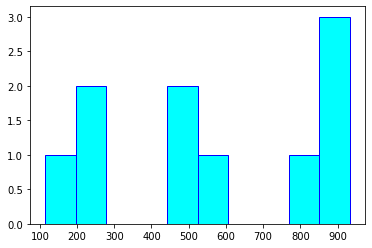

In [49]:
plt.hist(data['Miami'],
        facecolor='cyan',
        edgecolor='blue',
        bins=10)

Any histogram representation has three different components:

N : the frequency of each bin [Value on Y axis]<br>
bins : the number of bins <br>
patches : the shape that define the shape of histogram bar for each bin

n:  [1. 2. 0. 0. 2. 1. 0. 0. 1. 3.]
bins :  [115.  196.8 278.6 360.4 442.2 524.  605.8 687.6 769.4 851.2 933. ]
patches :  <a list of 10 Patch objects>


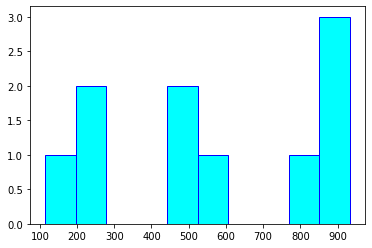

In [50]:
n,bins,patches = plt.hist(data['Miami'],
        facecolor='cyan',
        edgecolor='blue',
        bins=10)

print('n: ',n)
print('bins : ', bins)
print('patches : ', patches)

Instead of frequency, we plot the probability density for each bin on Y axis.<br>

pass density=True in plt.hist() function<br>

Other options available are:
    1. cumulative=True
    2. 

n:  [0.00122249 0.00244499 0.         0.         0.00244499 0.00122249
 0.         0.         0.00122249 0.00366748]
bins :  [115.  196.8 278.6 360.4 442.2 524.  605.8 687.6 769.4 851.2 933. ]
patches :  <a list of 10 Patch objects>


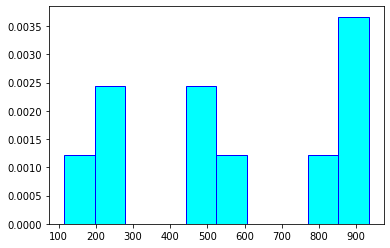

In [51]:
n,bins,patches = plt.hist(data['Miami'],
        facecolor='cyan',
        edgecolor='blue',
        bins=10,
        density=True)

print('n: ',n)
print('bins : ', bins)
print('patches : ', patches)

(array([4., 0., 0., 0., 0., 2., 1., 3.]),
 array([ 14.   , 135.375, 256.75 , 378.125, 499.5  , 620.875, 742.25 ,
        863.625, 985.   ]),
 <a list of 8 Patch objects>)

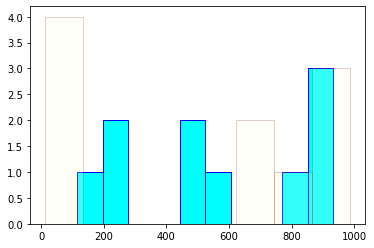

In [53]:
plt.hist(data['Miami'],
        facecolor='cyan',
        edgecolor='blue',
        bins=10)

plt.hist(data['New York'],
        facecolor='lightyellow',
        edgecolor='maroon',
        bins=8,
        alpha= 0.2)

<h2>Pie Charts</h2>